In [65]:
# 导入math模块，用于数学计算
import math
# 导入numpy库，用于科学计算，特别是多维数组操作
import numpy as np
# 导入scipy库，用于科学计算和工程计算
import scipy
# 导入matplotlib.pyplot，用于数据可视化
import matplotlib.pyplot as plt

我们在了解本章知识之前,我们需要一些数学知识来做铺垫.

# 范数与赋范空间的概念与性质

## 范数（Norm）
在数学中，特别是在泛函分析领域，范数是对向量空间中的元素大小的一种度量方式。它满足以下三个基本性质：

* 非负性：对于所有$v$属于向量空间$V$，有$||v|| \geq 0$，并且$||v|| = 0$当且仅当$v$是零向量。
* 齐次性：对于任意标量$a$和所有$v$属于$V$，有$||av|| = |a|||v||$。
* 三角不等式：对于所有$u, v$属于$V$，有$||u + v|| \leq ||u|| + ||v||$。

## 常见范数示例
* 欧几里得范数（$L_2$范数）：在实数或复数向量空间中，向量$(x_1, x_2, ..., x_n)$的$L_2$范数定义为$(\sum\limits_{i=1}^{n}|x_i|^2)^{\frac{1}{2}}$。
* 曼哈顿范数（$L_1$范数）：同上向量的$L_1$范数定义为$\sum\limits_{i=1}^{n}|x_i|%$。
* 最大范数（$L_{\infty}$范数）：同上向量的无穷范数定义为$\max_{i=1}^{n}|x_i|$。


## 赋范空间
一个赋范空间是一个向量空间$V$加上一个在其上的范数函数，使得该空间成为带有大小概念的空间。具体来说，赋范空间需满足：

* $V$是一个向量空间（即满足加法、标量乘法及其封闭性）。
* $V$上定义了一个范数函数$|\cdot|$，满足上述范数的三个基本性质。

### 赋范空间的性质
* 绝对收敛：在赋范空间中，如果序列${v_n}$满足$\sum\limits_{n=1}^{\infty}|v_n| < \infty$，则称该级数绝对收敛。
* 完备性：如果每一系列的向量，其范数之和收敛，则该系列极限也在空间内，这样的赋范空间称为完备的赋范空间。最著名的例子是希尔伯特空间，它 是基于内积定义的完备赋范空间。
* 开球与闭球：赋范空间中的开球是以某点为中心，以某一正数为半径的集合，所有到中心点范数距离小于该半径的点的集合；闭球则是所有到中心点范数距离不大于该半径的点的集合。

# 内积与内积空间的概念与性质

## 内积（Inner Product）
内积是向量空间中两个元素之间的一种代数运算，它产出一个标量结果，并满足以下三个性质：

* 对称性：对于所有$ u, v $属于向量空间$V$，有$\langle u, v \rangle = \overline{\langle v, u \rangle}$，这里$\overline{\langle u, v \rangle}$表示$\langle u, v \rangle$的共轭（在实数域中，共轭就是其本身）。
* 线性：对于所有$ u, v, w $属于$V$和所有标量$a,b$，有$\langle au+bv, w \rangle = a\langle u, w \rangle + b\langle v, w \rangle$。
* 正定性：对于所有非零向量$v$属于$V$，有$\langle v, v \rangle > 0$；而对于零向量，有$\langle 0, 0 \rangle = 0$。

## 内积空间
一个内积空间是由一个向量空间$V$加上一个内积函数构成的数学结构，使得该空间内的向量可以进行内积运算。\
内积空间的具体定义包括：

$V$是一个向量空间。
在$V$上定义了一个内积运算$\langle \cdot, \cdot \rangle$，满足上述内积的性质。

### 内积空间的性质
* 柯西-施瓦茨不等式：对于所有$u, v$属于$V$，有$|\langle u, v \rangle| \leq \sqrt{\langle u, u \rangle} \sqrt{\langle v, v \rangle}$。等号成立当且仅当$u$和$v$线性相关。
* 帕累托准则：在内积空间中，若$\langle u, v \rangle = 0$对所有(v)成立，则(u)必须是零向量。
* 正交性：若两个非零向量$u$和$v$满足$\langle u, v \rangle = 0$，则称这两个向量正交。
* 长度（范数）定义：内积可以用来定义向量的长度（或范数），即$|v| = \sqrt{\langle v, v \rangle}$，这满足范数的所有性质。

## 应用与实例
* 希尔伯特空间：完备的内积空间，是研究泛函分析、量子力学等领域的重要工具。
* 最小二乘法：在解决线性回归问题时，通过最小化误差向量的内积来找到最佳拟合线。
* 正交分解：在内积空间中，任何一个向量都可以唯一地表示为一组正交基的线性组合，这是傅立叶分析、信号处理等领域的基础。

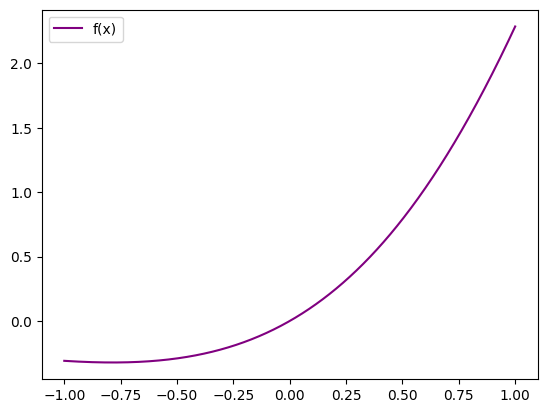

In [66]:
def I(x):
    return 1

def InnerProduct(phi1,phi2,a,b,rou = I):
    '''
    定义内积
    '''
    if isinstance(a,(int,float)) and isinstance(b,(int,float)):
        a = min(a,b)
        
        b = max(a,b)
        
        return scipy.integrate.quad(lambda x:rou(x) * phi1(x) * phi2(x),a,b)[0]
    
    else:
        raise TypeError("a,b must be int or float")


def f(x):
    return np.sin(x) * np.exp(x)

a,b = -1,1  ##采样区间
N = 1001  ##采样点数

degree = 7  ##多项式最高次项数

x = np.linspace(a,b,N)
y = np.array(f(x))

plt.plot(x,y,color = "Purple")
plt.legend(['f(x)'])

# 权函数

## 定义
类似于加权平均数的计算,只是将权重转化为连续形式来满足我们后面将要介绍的函数空间的性质。\
我们称一个函数$\rho(x)$是[a,b]上的一个权函数,如果$\rho$满足:
1. $\int_a^b x^k \rho(x) dx$存在且为有限值($k = 0,1,\cdots$)
2. 对[a,b]上的非负函数$g(x)$,如果有$\int_a^b g(x) \rho(x) dx = 0$,那么有$ g(x) \equiv 0$

# Gram矩阵

设$v$为一个内积空间,$u_1,\cdots,u_n \in V$,那么我们有Gram矩阵:
$$
G = \begin{bmatrix}
\langle u_1,u_1 \rangle & \cdots & \langle u_1,u_n \rangle \\
\vdots & \ddots & \vdots \\
\langle u_n,u_1 \rangle & \cdots & \langle u_n,u_n \rangle
\end{bmatrix}
$$
且对于Gram矩阵而言,其非奇异等价于其行列式不为0.

# 最佳逼近

## 定义
我们主要讨论对于一个函数$f(x),x \in C[a,b]$,求它的最佳逼近多项式$P^*(x)$,使得误差项:
$$ f(x) - P^*(x) = \min_{P(x) \in H}  ||f(x) - P(x)||_{L_n} $$
在某范数$L_n$定义下达到最小。

## 分类
当取不同范数类型时,我们会得到不同种类的最佳逼近。

1. 最佳一致逼近
   我们取$L_n = L_{\infty}$时,得到的逼近多项式为最佳一致逼近多项式,其为$f$的所有多项式逼近中`最大误差`最小的性质\
   其表达式为:$$ f(x) - P^*(x) = \min_{P(x) \in H} \max\limits_{a \leq x \leq b} |f(x) - P(x)| $$
2. 最佳平方逼近
   我们取$L_n = L_2$时,得到的逼近多项式为最佳平方逼近多项式。\
   其表达式为:$$ f(x) - P^*(x) = \min_{P(x) \in H}  \int_a^b (f(x) - P(x))^2 dx $$
   特别是在函数为列表函数时,这一方法生成多项式的过程称为`最小二乘拟合`

在介绍完这些基础知识后,我们来尝试进行函数逼近的部分\
出于理论体系的限制,我们目前来说先介绍`最佳平方逼近`的内容

# 多项式最佳平方逼近

## 概念介绍
多项式最佳平方逼近（Polynomial Least Squares Approximation）是最佳平方逼近的一个特殊情形，专注于使用多项式函数来逼近给定的数据集。具体而言，给定一组数据点$(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$，目标是找到一个最高次不超过$m$的多项式$P(x) = a_0 + a_1x + a_2x^2 + ... + a_mx^m$，使得所有数据点$y_i$与$P(x_i)$之间的平方误差之和最小。

## 核心性质
* 系数求解：多项式最佳平方逼近问题可通过建立并求解一个线性系统来完成。构造一个`Gram`矩阵，其中第$i$行对应于$[\varphi_0(x), \varphi_1(x), \varphi_2(x), ..., \varphi_n(x)]$分别与$\varphi_i(x)$做内积，然后利用该矩阵和$\langle y_i, \varphi_i \rangle$值向量解线性方程组，即可得到多项式的系数。

* 正交分解：在多项式空间（具有标准内积定义的空间）中，最佳平方多项式解可以视为数据点函数与多项式空间正交补的投影。这意味着最佳逼近多项式在多项式空间中与数据点函数的误差在某种意义上是“正交”的。

* 过拟合与欠拟合平衡：选择多项式的次数$m$是一个关键决策，因为过高的$m$可能导致过拟合（即模型对训练数据过度适应，泛化能力差），而过低的(m)可能导致欠拟合（模型简单，不能很好地捕捉数据特征）。通常需要通过交叉验证等方法来确定最优的(m)。

* 误差分析：尽管多项式逼近在理论上可以无限接近数据点，但实际应用中由于噪声的存在，增加多项式的次数并不总能持续减少误差。实际上，随着(m)的增加，误差可能会先减小后增大，形成所谓的“偏差-方差权衡”。

* 插值与逼近的区别：当多项式的次数(m=n-1)（数据点数量为(n)）时，可以实现完美插值，即通过每一个数据点。然而，最佳平方逼近并不总是寻求插值，而是寻找一个在某种意义下最优的近似，可能不经过所有数据点。

## 公式推导
我们首先来瞄准我们的目标函数:
$$ f(x) - P^*(x) = \min_{P(x) \in H}  \int_a^b (f(x) - P(x))^2 dx $$
因为$P(x) \in H$,我们不妨设次数为n次,则必有$P(x) = \sum\limits_{i=0}^{n} a_i \varphi_i(x)$,
此时,目标函数可以转化为一个关于$a_i$的多元函数:
$$ I(a_1,\cdots,a_n) = \int_a^b \rho(x) (\sum\limits_{i=0}^{n} a_i \varphi_i(x) - f(x))^2 dx $$
有多元函数求极值,我们知其极值点必满足:
$$ 
\frac{\partial I}{\partial a_k} = 2\int_a^b \rho(x)(\sum\limits_{i=0}^{n} a_i \varphi_i(x) - f(x))\varphi_k(x) = 0, \forall i \in [0,n] 
$$
也就是:
$$
\sum\limits_{i=0}^{n} a_i \langle \varphi_i(x),\varphi_k(x) \rangle = \langle f(x),\varphi_k \rangle \forall k \in [0,n]
$$
写为矩阵形式即为:
$$
Ga = b
$$
其中$G$为$\{\varphi_i(x)\}$生成Gram矩阵,$a$为系数向量,$b$为$\langle f(x),\varphi_k \rangle$向量。

在了解了最佳平方逼近的内容后,我们首先来尝试一下$P_n[x]$空间中,最一般的基底$\{1,x,\cdots,x^n\}$

In [67]:
def getStandardSpanPolyFitParams(func, n, a, b, rou = I):
    """
    使用标准多项式基底对函数进行拟合，返回多项式系数。

    :param func: 待拟合的函数
    :param n: 拟合多项式的阶数
    :param a: 函数域的左边界
    :param b: 函数域的右边界
    :param rou: 权函数,默认为自映射
    :return: 多项式系数数组
    """
    # 获取n阶需要n+1个基底
    n += 1

    # 初始化Gram矩阵，用于存储内积结果
    Gram = np.zeros((n, n))
    # 初始化b向量，用于存储函数在标准基底下的投影
    bias = np.zeros(n)

    # 遍历每个多项式基底
    for i in range(n):
        # 定义当前阶数的多项式基底函数
        def phi1(t):
            return t**i

        # 计算基底函数在func上的投影
        bias[i] = (InnerProduct(phi1, func, a, b,rou))
        
        # 遍历所有基底，计算当前基底与其他基底的内积
        for j in range(n):
            
            # 定义当前阶数的多项式基底函数
            def phi2(t):
                return t**j
            
            # 计算两个基底函数的内积
            Gram[i,j] = InnerProduct(phi1, phi2, a, b,rou)


    # 解方程组，求得多项式系数
    a = np.linalg.solve(Gram, bias)

    return a

In [68]:
def standardPolyFit(f,n,a,b,x,rou = I):
    """
    使用拟合多项式计算给定点的函数值。

    :param f: 待拟合的函数
    :param n: 拟合多项式的阶数
    :param a: 函数域的左边界
    :param b: 函数域的右边界
    :param x: 自变量值
    :return: 函数值
    
    :RAISES: TypeError 如果x不是int, float, list或numpy.ndarray类型,则抛出TypeError异常
    """
    params = getStandardSpanPolyFitParams(f, n, a, b)
    # 遍历所有系数，计算多项式值
    
    if isinstance(x,(int,float)):
        y = 0
        for i in range(n+1):
            y += params[i] * x**i
        return (y,params)
    
    elif isinstance(x,(list,np.ndarray)):
        y = np.zeros(len(x))
        for j in range(len(x)):
            y[j] = sum(params[i] * x[j]**i for i in range(n+1))
        
        return (y,params)
    
    else:
        raise TypeError("x must be int, float, list or numpy.ndarray")

In [69]:
def f_1(x):
    return np.sin(x)

x_1 = np.linspace(0, 2*np.pi, 101)
y_1,params = standardPolyFit(f_1, 1,0,2*np.pi,x_1)

plt.plot(x_1, f_1(x_1), 'b-', label='f(x)')
plt.plot(x_1, y_1, 'r-', label='1')

print(params)

print(3/np.pi,-3/np.pi ** 2)

[ 0.95492966 -0.30396355]
0.954929658551372 -0.3039635509270133


In [70]:
y_sp,params = standardPolyFit(f,degree,a,b,x)

error = np.abs(y-y_sp)

plt.figure(figsize = (20,5))

plt.subplot(1,3,1).plot(x,error,color = "yellow")
plt.subplot(1,3,1).set_title("error")
plt.subplot(1,3,1).legend("error")

plt.subplot(1,3,2).plot(x,y,color = "blue")
plt.subplot(1,3,2).set_title("y")
plt.subplot(1,3,2).legend("y")

plt.subplot(1,3,3).plot(x,y_sp,color = "red")
plt.subplot(1,3,3).set_title("y_sp")
plt.subplot(1,3,3).legend("y_sp")

在简单多项式作为基底的情况下,容易计算其Gram矩阵的值为:
$$
Gram = \begin{pmatrix}
1 & \cdots & \frac{1}{n} \\
\vdots & \ddots & \vdots \\
\frac{1}{n} & \cdots & \frac{1}{2n+1} 
\end{pmatrix}
$$
该矩阵又称为`Hilbert矩阵`,在n很大时其`条件数Cond`(详见Charpter5)极其的大,也就是这个矩阵比较病态,在实际矩阵计算中我们不推荐使用.  
下面给出了$N = {1,2,\cdots,20}$时上式的误差变化分析

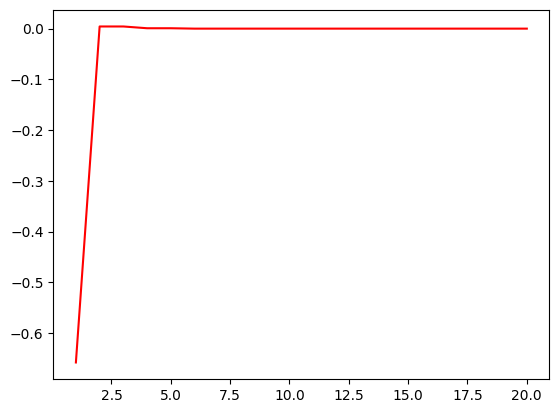

In [71]:
deg = np.array([i for i in range(1,21)])

y_standard_plot_n = [sum(standardPolyFit(f,i,a,b,x)[0]-y) for i in deg]

plt.plot(deg,y_standard_plot_n,color = "Red")

因为Hillbert矩阵在高维的情况下及其病态,因此我们需要考虑改进的措施,来使得函数逼近过程中Gram矩阵不在表现出类似于Hillbert矩阵遮掩个糟糕的性质.由矩阵条件数分析可知,一个矩阵的2-条件数$Cond_2(A) = ||A||_2 ||A^{-1}||_2$,因此,我们需要尽可能地使矩阵的非对角元素尽可能为0,对角线元素尽可能相近(详见论文).

# 正交多项式
正交多项式是一系列在特定区间上具有正交性质的多项式序列，它们在数学的多个领域，如数值分析、偏微分方程、理论物理等，扮演着重要角色。这类多项式在给定的权函数下，不同多项式两两之间的内积为零（除了常数倍数关系外）。

## 基本概念
### 定义
设$\rho(x)$是在区间$[a, b]$上的非负连续可积权函数，两个多项式$P_n(x)$和$P_m(x)$（其中$n \neq m$）如果满足如下条件，则称这两个多项式是关于权函数$\rho(x)$正交的： $$\int_a^b P_n(x)P_m(x)w(x)dx = 0$$

### 标准正交多项式
当对所有多项式进行归一化处理，即每个多项式的范数（通常定义为其平方在区间上的积分）为1时，这些多项式称为标准正交多项式。

### 最常见的正交多项式系
* 勒让德多项式（Legendre Polynomials）：区间$[-1, 1]$上，权函数为$w(x)=1$。
* 切比雪夫多项式（Chebyshev Polynomials）：区间$[-1, 1]$上，权函数为$w(x)=\frac{1}{\sqrt{1-x^2}}$。
* 三角函数多项式（Trigonometric Polynomials）：区间$[0, 2\pi]$上，权函数为$w(x)=1$。
* 拉盖尔多项式（Laguerre Polynomials）：区间$[0, +\infty)$上，权函数为$w(x)=e^{-x}$。
* 埃尔米特多项式（Hermite Polynomials）：区间$(-\infty, +\infty)$上，权函数为$w(x)=e^{-x^2}$。

## 性质
* 递推关系：正交多项式族通常可以通过递推关系来定义或计算，这为高效生成高阶多项式提供了方法。
  我们对于递推关系,由数学推理可知,任意正交多项式系满足:
  $$
  \varphi_{n+1}(x) = (x - \alpha_n)\varphi_n(x) - \beta_n\varphi_{n-1}(x)
  $$
  其中,$\alpha_n = \frac{\langle x\varphi_n(x),\varphi_n(x) \rangle}{\langle \varphi_n(x),\varphi_n(x) \rangle}$、$\beta_n = \frac{\langle \varphi_n(x),\varphi_n(x) \rangle}{\langle \varphi_{n-1}(x),\varphi_{n-1}(x) \rangle}$、$\varphi_0(x) = 1$、$\varphi_{-1}(x) = 0$


* 完备性：在适当的函数空间中，任何连续函数都可以用正交多项式的线性组合以任意精度近似。

* 正交性保证了最小误差：在多项式插值和最小二乘拟合问题中，使用正交多项式作为基可以最小化某些意义上的误差。

* 罗德里格斯公式：许多正交多项式可以通过罗德里格斯（Rodrigues）公式表达，该公式为一种生成公式，表明多项式可以通过其阶数和权函数的导数来构造。

在本文中,我们将详细介绍勒让德多项式(Legendre Polynomials)、切比雪夫多项式(Chebyshev Polyminals)以及三角多项式(Trigonometric Polynomials),以及其所具有的良好的性质

# Legendre多项式
## 定义
在区间$[-1,1]$上,权函数$\rho(x) \equiv 1$时,由标准基通过`Schmitz正交化`得到的多项式称为Legendre多项式,其定义为:
$$
P_0(x) = 1,\
P_n(x) = \frac{1}{2^nn!}\frac{{\text d}^n}{{\text d}x^n}(x^2 - 1)^n
$$
## 性质:
* 正交性:
$$
{\int_{-1}^1 P_n(x)P_m(x){\text d}x = \frac{2}{2n+1}\delta_{nm}},\delta_{nm} =\begin{cases}1,\text{ if }n=m\\0,\text{ if }n\neq m\end{cases}
$$
* 奇偶性:
$$
P_n(-x) = (-1)^nP_n(x)
$$
* 递推关系:
$$
(n+1)P_{n+1}(x) = (2n+1)xP_n(x) - nP_{n-1}(x)
$$
* 实零点性:
$$
P_n(x)在[-1,1]内含有n个实数零点
$$

In [72]:
def getLegendrePolyminals(x, n):
    """
    计算Legendre多项式的参数。

    该函数通过递归关系计算Legendre多项式的系数,这些多项式在各种数学和物理问题中都有应用。

    参数:
    x: numpy数组,表示x的值的列表,用于计算Legendre多项式。
    n: 整数,表示要计算的Legendre多项式的阶数。

    返回值:
    param: numpy数组,包含计算得到的Legendre多项式的系数。
    """

    # 将输入x转换为numpy数组，确保能够进行矩阵操作
    x = np.array(x)

    # 将n增加1，因为Legendre多项式的系数是从0开始计算的
    n += 1

    # 初始化一个空的参数数组，用于存储Legendre多项式的系数
    param = np.zeros((len(x), n))

    # 设置第一项和第二项的系数，分别为1和x
    param[:, 0] = 1
    param[:, 1] = x

    # 通过递归关系计算剩余的Legendre多项式系数
    for i in range(2, n):
        param[:, i] = (param[:, i - 1] * (2 * i - 1) * x / i - param[:, i - 2] * (i - 1) / i)

    return param

In [73]:
# 定义Legendre多项式的阶数
deg_len = degree

# 在区间[-1, 1]上生成101个等距点，用于计算和绘图
x_len = np.linspace(-1, 1, 101)

# 使用getLegendreParams函数计算每个点上的Legendre多项式系数
y_len = getLegendrePolyminals(x_len, deg_len)

# 绘制每个阶数的Legendre多项式曲线
for j in range(1, deg_len + 1):
    plt.plot(x_len, y_len[:, j])

In [74]:
def legendrePolyFit(f, x, n, a=-1, b=1, rou=I):
    """
    使用Legendre多项式拟合函数f在区间[a, b]上的数据点x。
    
    参数:
    f: 待拟合的函数。
    x: 数据点的x坐标数组。
    n: 拟合多项式的次数。
    a: 拟合区间左边界，默认为-1。
    b: 拟合区间右边界,默认为1。
    rou: 区间[a, b]上的权重函数,默认为常数函数I。
    
    返回:
    在数据点x处拟合的Legendre多项式值的数组。
    """
    
    # 多项式次数加1，因为范围是从0到n
    n += 1

    # 构建Gram矩阵，用于后续求解线性方程组
    Gram = np.array([[2/(2*i+1) if i == j else 0 for i in range(n)] for j in range(n)])

    # 初始化偏差向量
    bias = np.zeros(n)
    
    # 计算偏差向量的第一个元素，对应常数项的系数
    bias[0] = InnerProduct(f, I, a, b, rou)

    # 遍历计算偏差向量的其他元素，对应多项式各项的系数
    for i in range(1, n):
        # 定义辅助函数phi，用于计算Legendre多项式的某一项
        def phi(t):
            t = [t]
            return getLegendrePolyminals(t, i)[:, i]
        
        # 计算对应项的偏差
        temp = InnerProduct(f, phi, a, b, rou)
        bias[i] = temp

    # 解线性方程组，得到多项式的系数
    res = np.linalg.solve(Gram, bias)

    # 初始化结果数组
    ans = np.zeros_like(x)

    # 计算数据点x处的Legendre多项式值
    L = getLegendrePolyminals(x, n-1)
    
    # 遍历数据点，计算拟合值
    for i in range(len(x)):
        ans[i] = np.dot(L[i, :], res)

    # 返回拟合结果
    return (ans, res)


In [75]:
y_legendre,_ = legendrePolyFit(f,x,degree)

error_legendre = np.abs(y-y_legendre)

plt.figure(figsize = (20,5))

plt.subplot(1,3,1).plot(x,error_legendre,color = "yellow")
plt.subplot(1,3,1).set_title("error_legendre")
plt.subplot(1,3,1).legend("error_legendre")

plt.subplot(1,3,2).plot(x,y,color = "blue")
plt.subplot(1,3,2).set_title("y")
plt.subplot(1,3,2).legend("y")

plt.subplot(1,3,3).plot(x,y_legendre,color = "red")
plt.subplot(1,3,3).set_title("y_legendre")
plt.subplot(1,3,3).legend("y_legendre")

## Tips

实际上,我们可以通过理论推理得知Legendre多项式是所有多项式族中在$L_2$范数下最优的,即`勒让德多项式满足最佳平方逼近`

# Chebyshev多项式
## 定义
在区间$[-1,1]$上,权函数$\rho(x) \equiv \frac{1}{\sqrt{1-x^2}}$时,由标准基通过`Schmitz正交化`得到的多项式称为Chebyshev多项式,其定义为:
$$
T_n(x) = \cos(n\arccos(x)) \quad |x| \leq 1
$$
其中$n \in \mathbb{N}$

## 性质
* 递推关系:
$$
T_0(x) = 1,T_1(x) = x \\
T_{n+1}(x) = 2xT_n(x) - T_{n-1}(x), n \in \mathbb{N}
$$
* 正交性:Chebyshev多项式在$[-1,1]$上正交
$$
\int_{-1}^1\frac{T_n(x)T_m(x)}{\sqrt{1-x^2}}{\text d}x = \begin{cases} 0 & n \neq m \\ \frac{\pi}{2} & n = m \neq 0 \\ \pi & m = n = 0 \end{cases}
$$
* 奇偶对应性:
$$
T_{2k}(x){\text 只含x的偶次方},T_{2k+1}(x){\text 只含x的奇次方}
$$

In [76]:
def getChebyshevPolynomials(x, n):
    """
    计算给定点x的切比雪夫多项式。
    
    切比雪夫多项式是一组特殊的多项式序列，定义于切比雪夫函数中。
    这个函数生成一个二维数组,其中每一列代表了x对应点的切比雪夫多项式值。
    
    参数:
    x: np.array, 输入的点的数组。
    n: int, 需要计算的切比雪夫多项式的阶数。
    
    返回值:
    np.array, 一个二维数组,其中每一列代表了对应x值的切比雪夫多项式值。
    """
    # 将输入的x转换为numpy数组，确保后续计算的兼容性
    x = np.array(x)
    # 将n加1，因为切比雪夫多项式的计算从0阶开始，而输入的n通常是1-based的
    n += 1
    # 初始化一个二维数组，用于存放计算得到的切比雪夫多项式值
    param = np.zeros((len(x), n))
    # 初始条件：切比雪夫多项式的0阶和1阶值分别为1和x
    param[:, 0] = 1
    param[:, 1] = x
    # 通过递推关系计算切比雪夫多项式的高阶值
    for i in range(2, n):
        # 切比雪夫多项式的递推关系：T_n(x) = 2*x*T_{n-1}(x) - T_{n-2}(x)
        param[:, i] = (param[:, i - 1] * 2 * x - param[:, i - 2])
    # 返回计算得到的所有阶数的切比雪夫多项式值
    return param

In [77]:
deg_che = degree

x_che = np.linspace(-1,1,101)
y_che = getChebyshevPolynomials(x_che,deg_che)
for j in range(1,deg_che + 1):
    plt.plot(x_che,y_che[:,j])

In [78]:
def rho(x):
    """
    计算Chebyshev多项式插值的权重函数。
    
    参数:
    x: float - 输入变量
    
    返回:
    float - 权重函数的值
    """
    return 1/np.sqrt(1-x**2)

def chebyshevPolyFit(f,x,n,a = -1,b = 1,rou = I):
    """
    使用Chebyshev多项式进行插值拟合。
    
    参数:
    f: function - 需要拟合的函数
    x: array-like - 插值节点的数组
    n: int - 使用的Chebyshev多项式的阶数
    a: float, optional - 拟合区间下限,默认为-1
    b: float, optional - 拟合区间上限,默认为1
    rou: float, optional - 权重函数的参数,默认为1
    
    返回:
    array-like - 在给定节点上的插值值数组
    """
    n += 1  # 阶数加1以适应Chebyshev多项式的定义

    # 初始化Gram矩阵
    Gram = np.zeros((n,n))

    # 填充Gram矩阵
    for i in range(n):
        for j in range(n):
            if i == j and i == 0:
                Gram[i][j] = np.pi
            elif i == j and i != 0:
                Gram[i][j] = np.pi / 2
            else:
                Gram[i][j] = 0

    # 初始化偏差向量
    bias = np.zeros(n)

    # 计算偏差向量的第一个元素
    bias[0] = InnerProduct(f, lambda t: 1, a, b, rou)

    # 计算偏差向量的其他元素
    for i in range(1, n):
        def phi(t):
            t = [t]
            return getChebyshevPolynomials(t, i)[:, i]
        temp = InnerProduct(f, phi, a, b, rou)
        bias[i] = temp

    # 解线性方程组得到插值系数
    res = np.linalg.solve(Gram, bias)

    # 初始化结果数组
    ans = [0 for i in range(len(x))]

    # 计算Chebyshev多项式矩阵
    L = getChebyshevPolynomials(x, n-1)

    # 计算每个节点上的插值值
    for i in range(len(x)):
        ans[i] = np.dot(L[i, :], res)

    return ans,res

In [79]:
y_chebyshev,_ = chebyshevPolyFit(f,x,degree,rou=rho)

error_chebyshev = np.abs(y-y_chebyshev)

plt.figure(figsize = (20,5))

plt.subplot(1,3,1).plot(x,error_chebyshev,color = "yellow")
plt.subplot(1,3,1).set_title("error_chebyshev")
plt.subplot(1,3,1).legend("error_chebyshev")

plt.subplot(1,3,2).plot(x,y,color = "blue")
plt.subplot(1,3,2).set_title("y")
plt.subplot(1,3,2).legend("y")

plt.subplot(1,3,3).plot(x,y_chebyshev,color = "red")
plt.subplot(1,3,3).set_title("y_chebyshev")
plt.subplot(1,3,3).legend("y_chebyshev")

C:\Users\hasee\AppData\Local\Temp\ipykernel_6764\2690947310.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return scipy.integrate.quad(lambda x:rou(x) * phi1(x) * phi2(x),a,b)[0]


## Tips
Chebyshev多项式可以通过理论推演得知,其在$L_{\infty}$即无穷范数下具有近似最佳逼近效果(Proof请见零点交错定理).因此我们得出了以下两个定理:
1. 最小无穷范数定理:
   设$\widetilde T_n(x)$是首项为1的chebyshev多项式,则:
   $$
   \max\limits_{x\in[-1,1]} |\widetilde T_n(x)| \leq \max\limits_{x\in[-1,1]} |P_n(x)|,\forall P_n(x) \in \mathcal{P}_n
   $$
   且
   $$
   \max\limits_{x\in[-1,1]} |\widetilde T_n(x)| = \frac{1}{2^{n-1}}
   $$
   利用这一结论,我们可以来求$P(x) \in \mathcal{P}_n$在$\mathcal{P}_{n-1}$中的最佳一致逼近多项式
2. Chebyshev零点插值:
   这将会在下一个cell中介绍

# Chebyshev零点插值

## 概念
Chebyshev零点插值是一种基于Chebyshev多项式进行函数近似的方法。在进行函数插值时，选择Chebyshev多项式的零点作为插值节点，可以有效减少Runge现象（即高次插值在某些区间内的振荡加剧），从而获得更平滑且精确度更高的插值结果。

## Chebyshev多项式基础

* 零点: 第(n)阶Chebyshev多项式的零点均匀分布在([-1, 1])区间内，且随着阶数增加，零点更加靠近区间端点，这有助于在全区间内提供更均匀的误差分布。

## Chebyshev零点插值性质
* 稳定性与收敛性: 由于Chebyshev零点的特殊分布，即使在高阶插值中也能保持较好的稳定性，避免了高次多项式插值常见的振荡问题，保证了插值函数的光滑性。

* 计算效率: 利用Chebyshev多项式的递推关系和快速变换技术（如FFT），可以高效地计算Chebyshev系数，进而求得插值多项式。

* 误差估计: 对于足够光滑的函数，Chebyshev插值的误差估计通常比等距节点插值更优，特别是在函数变化剧烈的区域，能更好地逼近原函数。

* 权重函数: 在构建插值矩阵时，常采用Chebyshev权重函数$\rho(x) = 1/\sqrt{1-x^2}$，它能够根据x的值调整插值点的权重，进一步优化插值效果。

在离散点曲线拟合中,我们类似于函数拟合的思路,需要选取代数空间${\phi}$,选取代数空间基底$\{\varphi_i\}$,选取最优化策略$\delta$,在上述工作结束后,采用代数方法求解方程组
$$
f_j = \sum_{i = 0}^na_i x_{j}^i\quad,\quad j = 0,1, \cdots ,n
$$

下面我们将会以$\delta = \sum_{i = 0}^n\omega(x_i)(S(x_i) - f(x_i))^2$,即空间梯度优化方向为最小二乘方向.我们将会选取不同的空间与权函数来进行拟合

正交多项式空间:
$$
P_0 = 1,P_1 = (x - \alpha_1)P_0(x)\\
P_{k + 1} = (x - \alpha_{k+1})P_k(x) - \beta_kP_{k-1}(x)
$$
其中,
$$
\alpha_{k+1} = \frac{(xP_k(x),P_k(x))}{(P_k(x),P_k(x))}\\
\beta_{k} = \frac{(P_k(x),P_k(x))}{(P_{k-1}(x),P_{k-1}(x))}
$$

In [80]:
def standardOmega(x):
    return 1


def orthogonalPolyFit(x,y,n,x_in,omega = standardOmega):

    n += 1

    m = len(x)

    p = np.zeros((m,n))

    p[:,0] = 1

    a = list()
    res1 = 0
    res2 = 0

    for i in range(m):
        res1 += omega(x[i]) * x[i] * p[i,0] ** 2
        res2 += omega(x[i]) * p[i,0] ** 2
    a.append(res1/res2)


    b = list()


    p[:,1] = x_in - a[0]

    for i in range(2,n):

        res1,res2 = 0,0
        for j in range(m):
            res1 += omega(x[j]) * x[j] * p[j,i - 1] ** 2
            res2 += omega(x[j]) * p[j,i - 1] ** 2
        a.append(res1/res2)

        res1,res2 = 0,0
        for j in range(m):
            res1 += omega(x[j]) * p[j,i] ** 2
            res2 += omega(x[j]) * p[j,i - 1] ** 2
        b.append(res1/res2)


        p[:,i] = (x_in - a[i - 1]) * p[:,i-1] - b[i-2] * p[:,i-2]


    params = list()

    for i in range(n):
        res1,res2 = 0,0
        for j in range(m):
            res1 += omega(x[j]) * y[j] * p[j,i]
            res2 += omega(x[j]) * p[j,i] ** 2
        params.append(res1/res2)


    res = 0
    for i in range(n):
        res += params[i] * p[0,i]
    return res

三角多项式插值:
在介绍三角多项式插值实现之前,我们先来介绍一下其用到的相关理论(主要是Fourier变换)  
设$f(x)$是一个以$2\pi$为周期的平方可积函数,则$f(x)$可以展开为:
$$
f(x) = \sum_{i = 0}^\infty a_i \cos(i x) + b_i \sin(i x)
$$
其中$a_i$和$b_i$分别为:
$$
a_i = \frac{2}{2\pi} \int_0^{2\pi} f(x) \cos(ix) dx
$$
$$
b_i = \frac{2}{2\pi} \int_0^{2\pi} f(x) \sin(ix) dx
$$
而在其中,我们根据$\sin{ix},\cos{ix}$的正交性又可以得到:
$$
\begin{align}
    & \sum_{i = 0}^{2m}\sin(lx_i)\sin(kx_i) = \begin{cases}
    0, & l \neq k \quad or \quad l = k = 0 \\ 
    \frac{2}{2m+1}, & l = k \neq 0
    \end{cases}  \\
    & \sum_{i = 0}^{2m}\cos(lx_i)\cos(kx_i) = \begin{cases}
    0, & l \neq k \\ 
    \frac{2}{2m+1}, & l = k \neq 0 \\
    2m+1 & l = k = 0
    \end{cases} \\
    & \sum_{i = 0}^{2m}\sin(lx_i)\cos(kx_i) = 0
\end{align}
$$

书面作业编程1:  
设$f(x) = x^2 + 3x + x,x \in [0,1]$,求$\phi = span\{1,x\}$中的最佳平方逼近多项式.若取$\phi = span\{1,x,x^2\}$,其最佳平方逼近是什么?

Method:  
在做这道题目时,我们已经提前编写好了多项式标准基的拟合函数,只需要将目标函数带入其中即可得到我们需要的相关结果

In [82]:
def f_ep12(x):
    ## 目标函数
    return x**2 + 3*x + 2

N_ep12 = 501 ## 绘图点个数

x = np.linspace(0,1,N_ep12)

y = np.array(f_ep12(x))

y_span1,params1 = standardPolyFit(f_ep12,1,0,1,x) #span = {1,x}的情况
y_span2,params2 = standardPolyFit(f_ep12,2,0,1,x) #span = {1,x,x^2}的情况

error1 = abs(y_span1 - y) / N_ep12
error2 = abs(y_span2 - y) / N_ep12

plt.figure(figsize=(10,5))
plt.subplot(1,2,1).plot(x,y)
plt.subplot(1,2,1).plot(x,y_span1)
plt.subplot(1,2,1).plot(x,y_span2)
plt.subplot(1,2,1).legend(['f(x)','fit function with span1','fit function with span2'])

plt.subplot(1,2,2).plot(x,error1)
plt.subplot(1,2,2).plot(x,error2)
plt.subplot(1,2,2).legend(['error with span1','error with span2'])

print(params1)
print(params2)


[1.83333333 4.        ]
[2. 3. 1.]


从上计算中我们得到了在不同基底下关于函数的逼近,其结果为:  
$\phi = \{1,x\}$基底下其拟合为:$fit(x) = 4x + 1.833333$,误差为:$1.1277$  
$\phi = \{1,x,x^2\}$基底下其拟合为:$fit(x) = x^2 + 3x + 2$,误差为:$1.0352$

书面作业作业2:  
已知实验数据如下:  用最小二乘法求形如$y = a + bx^2$的经验公式   
$x = [19,25,31,38,44]$ \
$y = [19.0000,32.3000,49.0000,73.3000,97.8000]$

Method:  
在处理这道问题时,我们发现他所选用的基底是标准基中的分量,因此我们需要通过求解法方程的方式来解决这道题目

In [83]:
x_ep17 = [19,25,31,38,44]
y_ep17 = [19.0000,32.3000,49.0000,73.3000,97.8000]

def solveOfEp17(x,y):

    ## 权重系数 = 1

    delta = 0

    a,b = 19,44

    G = np.zeros((2,2))
    b = np.zeros((2,1))

    for i in range(2):
        if i == 0:
            b[i,0] = sum([k for k in y])
        else:
            b[i,0] = sum([x[k]**2 * y[k] for k in range(len(x))])


        for j in range(2):
            if i + j == 0:
                G[i,j] = sum([1*1 for k in range(len(x))])
            elif i+j == 1:
                G[i,j] = sum(x[k]**2 * 1 for k in range(len(x)))
            else:
                G[i,j] = sum(x[k]**4 for k in range(len(x)))


    param = np.linalg.solve(G,b)

    delta = sum([(y[k] - param[0] - param[1] * x[k] ** 2) ** 2 for k in range(len(x))])

    return [param,delta]

x_ep17_plot = np.linspace(19,44,501)
y_ep17_plot = [solveOfEp17(x_ep17,y_ep17)[0][0] + solveOfEp17(x_ep17,y_ep17)[0][1] * x_ep17_plot[i] ** 2 for i in range(501)]

delta = solveOfEp17(x_ep17,y_ep17)[1]

plt.scatter(x_ep17,y_ep17)
plt.plot(x_ep17_plot,y_ep17_plot)
plt.legend(["DataPoints","LSMFitFunction"])

res = solveOfEp17(x_ep17,y_ep17)

print("拟合结果为:",*res[0][0]," + ",*res[0][1],"* x^2","其误差为:",*res[1])

拟合结果为: 0.9725786569067494  +  0.05003512421916017 * x^2 其误差为: 0.015023208945665941


上机练习1:  
1. 输出m阶Hilbert矩阵Hm (hilb )，并计算行列式(det)，条件数(cond)  
 取m = 3, 6, 9, 12，观察Hilbert矩阵的行列式和条件数


In [84]:
def hm(n):
    res = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            res[i,j] = 1/ (i+j+1)
    
    return res

M = [3,6,9,12]
H_message = list() ##Hilbert Matrix的阶数、矩阵的行列式、矩阵的行列式条件数

for m in M:
    H = hm(m)

    value = np.linalg.det(H)

    con = np.linalg.cond(H)

    H_message.append([m, value, con])

    print('m = %d, det = %.8f, cond = %.2f' % (m, value, con))

m = 3, det = 0.00046296, cond = 524.06
m = 6, det = 0.00000000, cond = 14951058.64
m = 9, det = 0.00000000, cond = 493153409309.62
m = 12, det = 0.00000000, cond = 16223826740810282.00


2. 取 n = 20, 将区间[0, 1]进行n等分得到$\{x_k\}_{k = 0}^n$取m = 2,$\{\varphi_j = x^j\}_{j = 0}^m$,定义离散的内积
$A_{ij} = \sum_{k = 0}^n \varphi_i(x_k) \varphi_j(x_k)$,输出矩阵$A = (A_{ij})_{(m+1)*(m+1)}$,并计算A的条件数；和$H_3$做比较； 再取m = 5, 10 计算A并与$H_6$, $H_{11}$比较条件数 


In [85]:
N = 21

x = np.linspace(0,1,N)

def makeA(m,x):
    A = np.zeros((m+1,m+1))

    for i in range(m+1):

        for j in range(m+1):

            A[i,j] = sum(k ** i * k ** j for k in x)


    return A

M = [2,5,10]

A_message = list()

for m in M:
    A = makeA(m,x)

    value = np.linalg.det(A)

    con = np.linalg.cond(A)

    A_message.append([m,value,con])

print(A_message)

for i in range(3):
    print(A_message[i][2] / H_message[i][2])

[[2, 5.667753437500056, 439.86381373724237], [5, 1.5620082425505046e-09, 10632064.658068063], [10, 1.2349155901344437e-49, 537858129286825.6]]
0.8393438126368019
0.7111245372678519
1090.6507369376072


3. 利用Matlab反斜杠命令求解超定方程 $Ax = b$, 并与$(A^T ∗ A)x = A^T ∗ b$,比较计算结果:
$$
A = 
\left(
\begin{array}{c}
1 & 2 \\
2 & 1 \\
2 & 2 \\
-1 & 2 \\
3 & -1
\end{array}
\right),
b = 
\left(
\begin{array}{c}
4 \\
5 \\
6 \\
2 \\
4
\end{array}
\right)
$$

In [86]:
A = np.array([[1, 2], [2,1], [2,2],[-1,2],[3,-1]])
bias = np.array([4,5,6,2,4]).T

x1 = np.linalg.lstsq(A,bias)
x2 = np.linalg.lstsq(A.T @ A,A.T @ bias)

print(x1)

print(x2)

(array([1.6692607 , 1.42801556]), array([1.20622568]), 2, array([4.51720321, 3.54892592]))
(array([1.6692607 , 1.42801556]), array([], dtype=float64), 2, array([20.40512484, 12.59487516]))


C:\Users\hasee\AppData\Local\Temp\ipykernel_6764\1874598418.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x1 = np.linalg.lstsq(A,bias)
C:\Users\hasee\AppData\Local\Temp\ipykernel_6764\1874598418.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x2 = np.linalg.lstsq(A.T @ A,A.T @ bias)


4. 取Chebyshev-Lobatto点
$x_j = \cos(j*\pi / n),0\leq j \leq n$分别对函数
$$
f(x) = \sin(\pi * x),f(x) = \frac{x}{2} + \lvert x \rvert - x^2,x \in [-1,1]
$$
做多项式插值;取n = 10,20,40,在等距节点t = -1:0.01:1上输出结果,并检验与精确解的误差

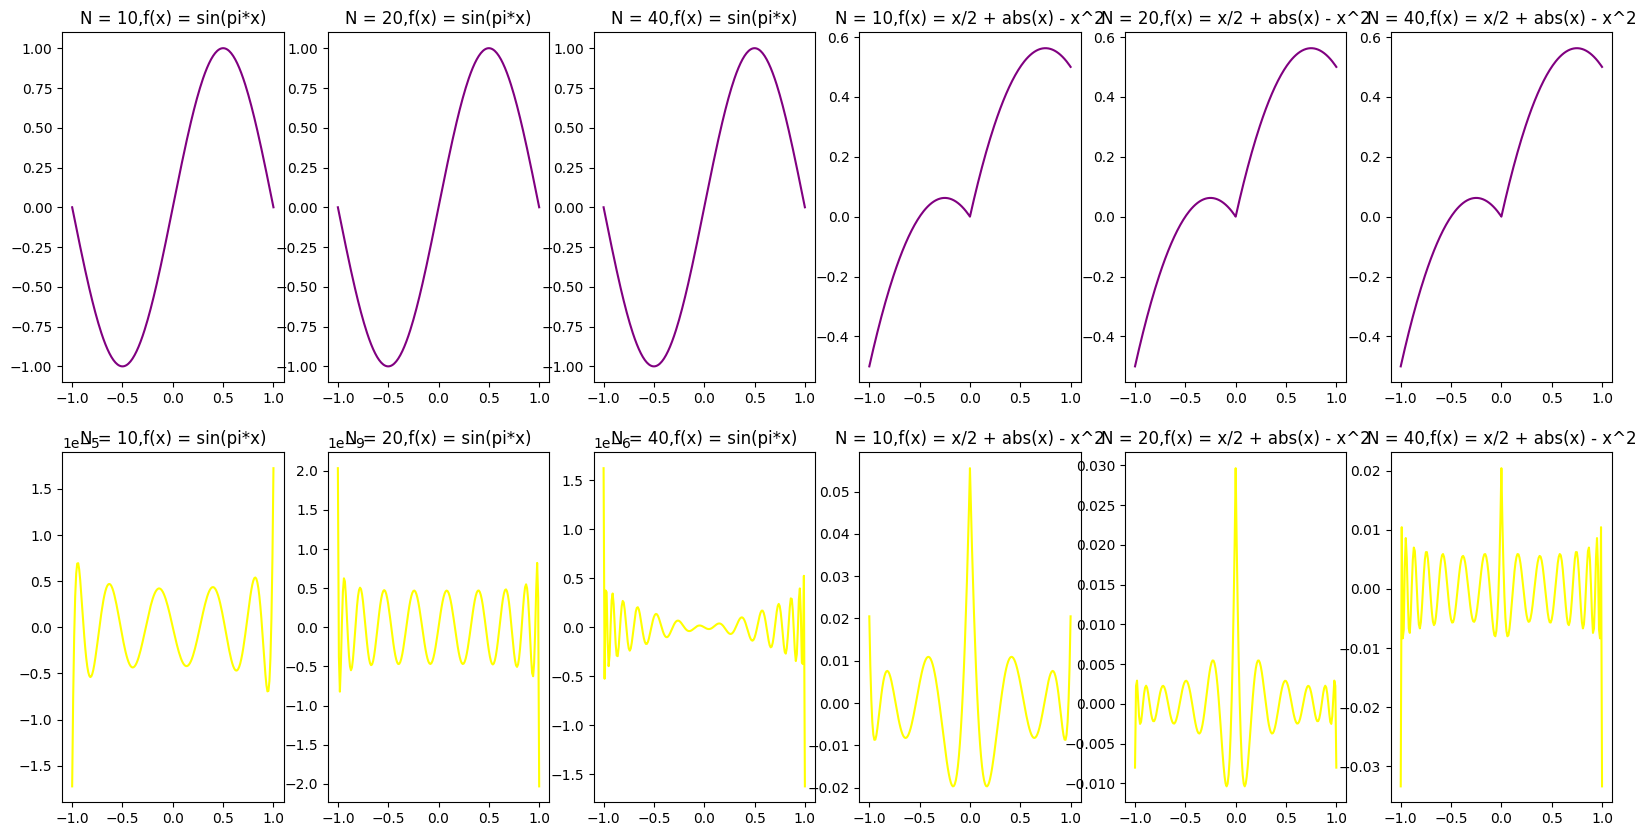

In [87]:
N = [10,20,40]

t = np.linspace(-1,1,201)

def f1(x):
    return np.sin(np.pi * x)

y1 = np.array(f1(t))

def f2(x):
    return x/2 + np.abs(x) - x**2

y2 = np.array(f2(t))

plt.figure(figsize=(20,10))

for i in range(len(N) * 2):
    
    if i <= 2:

        polyfitf1,_ = standardPolyFit(f1,N[i],a,b,t)

        error_f1 = polyfitf1 - y1 
        
        plt.subplot(2,6,i+1).plot(t,y1,'purple')
        plt.subplot(2,6,i+1).set_title('N = '+str(N[i]) + ",f(x) = sin(pi*x)")
        plt.subplot(2,6,i+7).plot(t,error_f1,'yellow')
        plt.subplot(2,6,i+7).set_title('N = '+str(N[i]) + ",f(x) = sin(pi*x)")
        
    else:
        
        polyfitf2,_ = standardPolyFit(f2,N[i-3],a,b,t)
        
        error_f2 = polyfitf2 - y2
        
        plt.subplot(2,6,i+1).plot(t,y2,'purple')
        plt.subplot(2,6,i+1).set_title('N = '+str(N[i-3]) + ",f(x) = x/2 + abs(x) - x^2")
        plt.subplot(2,6,i+7).plot(t,error_f2,'yellow')
        plt.subplot(2,6,i+7).set_title('N = '+str(N[i-3]) + ",f(x) = x/2 + abs(x) - x^2")
        
    
    

5. 对Runge函数
$$
f(x) = \frac{1}{25 + x^2},x\in[-1,1]
$$
取N= 1001,记$x_j = -1 + \frac{2j}{N},j = 0,\cdots,N$.对离散的数据$(x_j,f(x_j))$计算离散的m次最佳平方逼近多项式
$$
p_m(x) = \sum_{k = 0}^na_kT_k(x),T_k(x) \text{为Chebyshev多项式}
$$
要求:   
1.设m = 20,计算$p(x_j)$并画出误差曲线$f(x_j) - p(x_j)$;输出$e_m = \max\limits_{0 \leq N} \lvert f(x_j) - p(x_j) \rvert$
2.取不同的m = 10,20,30,$\cdots$,100,计算相应的误差$e_m$;画出误差随m变化的曲线

In [88]:
N = 1001

M = [10 * i for i in range(1,7)]

x = np.linspace(-1,1,N)

def runge(x):
    return 1/(25 + x**2)

y = runge(x)

e = np.zeros(len(M))

i = 0

for m in M:

    y_chebyshev_fit,_ = chebyshevPolyFit(runge,x,m)

    e[i] = np.max(abs(y - y_chebyshev_fit))
    
    i+=1

    if m == 20:
        
        errorChe = abs(y - y_chebyshev_fit)

        print("The maximum of the error is:",np.max(errorChe))
        plt.figure("The Error Curve as m = 20",figsize= (6,4))
        
        plt.plot(x,errorChe)


plt.figure('The Error Curve Change with M',figsize= (6,4))
plt.plot(M,e)

The maximum of the error is: 0.03729577320054667


上机练习2:  
1.给定逼近函数
$$
f(x) = sin(\pi * x),-1\leq x \leq 1
$$
编写程序计算其最佳平方逼近3次多项式,并画出相应的曲线比较;进一步测试最佳平方逼近4次多项式,5次多项式,6次多项式;说出观察到的现象。说明：此处的多项式空间的基函数可以选择单项式$1,x,x^2,x^3$; 也可选择Legendre多项式作为基函数。


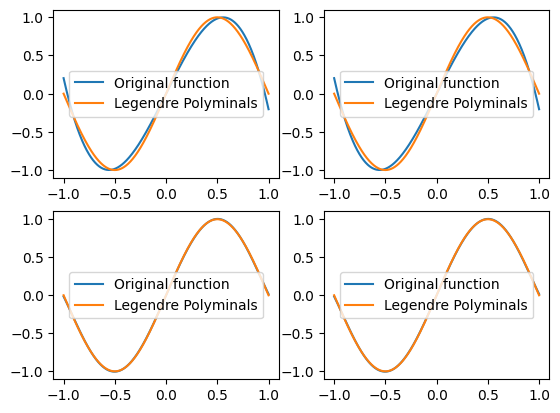

In [90]:
def f_ep1(x):
    return np.sin(np.pi * x)

N = 1001

x = np.linspace(-1, 1, N)

y = f_ep1(x)

M = [3,4,5,6]

fig = plt.figure()

ax = [fig.add_subplot(2,2,i) for i in range(1,5)]

for m in M:

    ##选择legendre基底

    y,_ = legendrePolyFit(f_ep1,x,m)
    

    ax[m-3].plot(x,y)
    ax[m-3].plot(x,f_ep1(x))
    ax[m-3].legend(["Original function","Legendre Polyminals"])


实际上,函数逼近的思想在多维函数上同样适用.这一思想的演化推进最终产生了机器学习(深度学习)的内容.  
下面我将用PyTorch的代码来展现2D平面上的函数逼近理论与相关性质

In [91]:
import torch
from torch import nn

import math

In [92]:
import torch
import torch.nn as nn
from torch.optim import SGD

# 定义多项式的最大阶数，以便于灵活性
net_n = 6

class PolynomialLayer(nn.Module):
    """
    多项式神经网络层。
    
    参数:
    - inunits: 输入单元数。
    - outunits: 输出单元数。
    - degree: 多项式的最大阶数。
    """
    def __init__(self, inunits, outunits, degree):
        super().__init__()
        # 初始化权重和偏置
        self.weight = nn.Parameter(torch.randn(inunits, outunits)).requires_grad_()
        self.bias = nn.Parameter(torch.randn(1, outunits)).requires_grad_()
        self.degree = degree  # 多项式的最大阶数
    
    def forward(self, x):
        """
        前向传播。
        
        参数:
        - x: 输入数据。
        
        返回:
        - 多项式函数的输出。
        """
        # 确保输入x是1维的
        x = x.view(-1, 1)
        # 使用张量操作计算多项式和
        powers = torch.pow(x, torch.arange(self.degree + 1))
        res = torch.sum(self.weight * powers, dim=0) + self.bias
        return res

net = nn.Sequential(
    PolynomialLayer(net_n, 1, net_n),  # 使用多项式的最大阶数
)

xdata = torch.arange(0, 100, 0.1)
ydata = torch.exp(xdata)

loss_fn = nn.MSELoss()
optimizer = SGD(net.parameters(), lr=0.01)

for epoch in range(20):
    for x, y in zip(xdata, ydata):
        y_pred = net(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'epoch: {epoch + 1}, loss: {loss.item()}')

e:\anaconda\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 7])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 1, loss: nan
epoch: 2, loss: nan
epoch: 3, loss: nan
epoch: 4, loss: nan
epoch: 5, loss: nan
epoch: 6, loss: nan
epoch: 7, loss: nan
epoch: 8, loss: nan
epoch: 9, loss: nan
epoch: 10, loss: nan
epoch: 11, loss: nan
epoch: 12, loss: nan
epoch: 13, loss: nan
epoch: 14, loss: nan
epoch: 15, loss: nan
epoch: 16, loss: nan
epoch: 17, loss: nan
epoch: 18, loss: nan
epoch: 19, loss: nan
epoch: 20, loss: nan
